In [220]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [221]:
df = pd.read_csv('/kaggle/input/ajoneuvo-avoin-data/Ajoneuvojen_avoin_data_5_21.csv', encoding="ISO-8859-1", sep=';', low_memory=False)

In [222]:
df.shape

(5360981, 41)

Tiedostossa on 5360981 riviä ja 41 saraketta

In [223]:
df.head(10)

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2,matkamittarilukema,valmistenumero2,jarnro
0,MUU,NaN,21.0,1.0,NaN,NaN,19670000,NaN,NaN,NaN,...,NaN,01,91.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,MUU,1976-09-01,13.0,1.0,NaN,NaN,19760000,NaN,NaN,NaN,...,NaN,NaN,475.0,NaN,NaN,NaN,NaN,NaN,NaN,2
2,M1,1984-07-09,NaN,1.0,NaN,NaN,19840000,1,NaN,NaN,...,NaN,01,564.0,NaN,NaN,NaN,NaN,NaN,NaN,3
3,MUU,1983-09-22,13.0,1.0,NaN,NaN,19830000,NaN,NaN,NaN,...,NaN,NaN,734.0,NaN,NaN,NaN,NaN,NaN,NaN,4
4,O1,1994-02-09,1.0,1.0,NaN,NaN,19940209,NaN,NaN,NaN,...,NaN,NaN,761.0,NaN,NaN,NaN,NaN,NaN,NaN,5
5,M1,1990-05-08,NaN,5.0,NaN,NaN,19900508,9,NaN,NaN,...,NaN,01,91.0,NaN,NaN,NaN,NaN,NaN,VF7XBEY000,6
6,M1,2003-08-08,NaN,1.0,NaN,5365292375,20030808,2,NaN,AB,...,NaN,01,609.0,143.0,NaN,NaN,NaN,159443.0,VF1CB0FCF2,7
7,M1,2003-10-02,NaN,1.0,1,4,20031002,6,NaN,AA,...,e6*2001/116*0091*00,01,837.0,190.0,NaN,NaN,NaN,279326.0,JHMCL75403,8
8,M1,2006-03-17,NaN,1.0,ZZE121(W),ZZE121L-DWMNKW(1G),20060317,Y,NaN,AC,...,e11*2001/116*0181*06,01,989.0,172.0,NaN,NaN,NaN,151108.0,NMTEZ20E80,9
9,M1,2007-01-05,NaN,1.0,ALA30(WT),ALA30L-AWFGYW(1B),20070105,2,NaN,AF,...,e6*2001/116*0105*01,02,694.0,173.0,NaN,NaN,NaN,2692651.0,JTMBA31V10,10


In [224]:
df.columns

Index(['ajoneuvoluokka', 'ensirekisterointipvm', 'ajoneuvoryhma',
       'ajoneuvonkaytto', 'variantti', 'versio', 'kayttoonottopvm', 'vari',
       'ovienLukumaara', 'korityyppi', 'ohjaamotyyppi', 'istumapaikkojenLkm',
       'omamassa', 'teknSuurSallKokmassa', 'tieliikSuurSallKokmassa',
       'ajonKokPituus', 'ajonLeveys', 'ajonKorkeus', 'kayttovoima',
       'iskutilavuus', 'suurinNettoteho', 'sylintereidenLkm', 'ahdin',
       'sahkohybridi', 'sahkohybridinluokka', 'merkkiSelvakielinen',
       'mallimerkinta', 'vaihteisto', 'vaihteidenLkm', 'kaupallinenNimi',
       'voimanvalJaTehostamistapa', 'tyyppihyvaksyntanro',
       'yksittaisKayttovoima', 'kunta', 'NEDC_Co2', 'NEDC2_Co2', 'WLTP_Co2',
       'WLTP2_Co2', 'matkamittarilukema', 'valmistenumero2', 'jarnro'],
      dtype='object')

Karsitaan epärelevantit ja virkavallan omat merkinnät. Käytetään kommentointia ("#") sarakkeiden passivoimiseksi. Pidetään toistaiseksi valmistenumeroa saatavilla.

In [225]:
df = df[['ajoneuvoluokka',
    'ensirekisterointipvm', 
    #'ajoneuvoryhma',
     #  'ajoneuvonkaytto', 'variantti', 'versio', 
    'kayttoonottopvm', 'vari',
       #'ovienLukumaara', 
         'korityyppi', 
    #'ohjaamotyyppi', 
    'istumapaikkojenLkm',
       'omamassa',
    #'teknSuurSallKokmassa', 'tieliikSuurSallKokmassa',
       'ajonKokPituus', 'ajonLeveys', 'ajonKorkeus', 'kayttovoima',
       'iskutilavuus', 
    #'suurinNettoteho', 
    'sylintereidenLkm', 'ahdin',
       'sahkohybridi', 
    #'sahkohybridinluokka', 
    'merkkiSelvakielinen',
    #   'mallimerkinta', 
    'vaihteisto', 
         #'vaihteidenLkm', 
         'kaupallinenNimi',
     #  'voimanvalJaTehostamistapa', 'tyyppihyvaksyntanro',
       'yksittaisKayttovoima', 'kunta', 'NEDC_Co2', 'NEDC2_Co2', 'WLTP_Co2',
       'WLTP2_Co2', 'matkamittarilukema', 
    'valmistenumero2',
         #'jarnro'
            ]].copy()


In [226]:
df.shape

(5360981, 26)

Selvitetään tyhjien solujen määriä, jotta päällekkäisyyksiä voidaan karsia.

In [227]:
df.isna().sum()

ajoneuvoluokka                0
ensirekisterointipvm     175378
kayttoonottopvm               0
vari                    1975291
korityyppi              2131847
istumapaikkojenLkm      1171683
omamassa                  12101
ajonKokPituus            627040
ajonLeveys               334804
ajonKorkeus             1784969
kayttovoima             1164301
iskutilavuus            1239617
sylintereidenLkm        1689878
ahdin                   2639352
sahkohybridi            3359904
merkkiSelvakielinen        1878
vaihteisto              2881824
kaupallinenNimi         1329027
yksittaisKayttovoima    1164299
kunta                        66
NEDC_Co2                2868917
NEDC2_Co2               5270268
WLTP_Co2                4974773
WLTP2_Co2               5277736
matkamittarilukema      2493942
valmistenumero2         2567916
dtype: int64

Karsitaan "päällekkäisyyksiä", mistä on vähiten hyötyä.

In [228]:
df = df.drop(['ensirekisterointipvm', 'sahkohybridi', 'NEDC2_Co2', 'WLTP_Co2', 'WLTP2_Co2', 'valmistenumero2', 'yksittaisKayttovoima'], axis=1)

In [229]:
df.dtypes

ajoneuvoluokka          object
kayttoonottopvm          int64
vari                    object
korityyppi              object
istumapaikkojenLkm     float64
omamassa               float64
ajonKokPituus          float64
ajonLeveys             float64
ajonKorkeus            float64
kayttovoima             object
iskutilavuus           float64
sylintereidenLkm       float64
ahdin                   object
merkkiSelvakielinen     object
vaihteisto              object
kaupallinenNimi         object
kunta                  float64
NEDC_Co2               float64
matkamittarilukema     float64
dtype: object

In [230]:
df['ajoneuvoluokka'].value_counts().head(40)

ajoneuvoluokka
M1     2714029
O1      789899
MUU     450739
N1      295650
O2      193021
M1G     111559
L3       91561
L3e      85812
L1e      80689
T3       68168
MA       56247
O4       55301
N3       51923
N1G      51846
T        49926
MTK      47006
T1       40271
L1       38048
N2       35741
LTR      11521
M3        7699
N2G       6828
L7e       5530
T2        5303
L6e       4769
N3G       3033
M2        2296
L2e       2281
L2        1444
L4         971
O3         631
L5e        571
L5         273
T5         207
L4e        122
T4          35
C1          22
M2G          4
C3           2
C2           1
Name: count, dtype: int64

Selvitetään lyhenteiden merkitykset

In [231]:
df.query('ajoneuvoluokka == "M1"')

,ajoneuvoluokka,kayttoonottopvm,vari,korityyppi,istumapaikkojenLkm,omamassa,ajonKokPituus,ajonLeveys,ajonKorkeus,kayttovoima,iskutilavuus,sylintereidenLkm,ahdin,merkkiSelvakielinen,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,matkamittarilukema
2,M1,19840000,1,NaN,5.0,780.0,NaN,1590.0,NaN,01,1110.0,4.0,NaN,Ford,NaN,FIESTA,564.0,NaN,NaN
5,M1,19900508,9,NaN,5.0,1060.0,4270.0,1680.0,NaN,01,1900.0,4.0,NaN,Citroen,NaN,BX,91.0,NaN,NaN
6,M1,20030808,2,AB,5.0,955.0,3770.0,1640.0,1420.0,01,1140.0,4.0,NaN,Renault,NaN,CLIO,609.0,143.0,159443.0
7,M1,20031002,6,AA,5.0,1462.0,4670.0,1760.0,1450.0,01,1990.0,4.0,NaN,Honda,NaN,ACCORD,837.0,190.0,279326.0
8,M1,20060317,Y,AC,5.0,1270.0,4410.0,1710.0,1500.0,01,1590.0,4.0,NaN,Toyota,NaN,COROLLA,989.0,172.0,151108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360963,M1,20220527,8,AC,5.0,1975.0,4545.0,1805.0,1680.0,01,2360.0,4.0,False,Mitsubishi,Y,Mitsubishi Eclipse Cross,562.0,NaN,24945.0
5360966,M1,20200313,0,AA,5.0,1684.0,4694.0,1850.0,1443.0,04,NaN,NaN,False,Tesla,Y,Model 3,609.0,NaN,64205.0
5360970,M1,19300630,6,AA,5.0,1300.0,4300.0,1700.0,NaN,01,3205.0,6.0,False,Chrysler,1,Six,564.0,NaN,83327.0
5360976,M1,20220516,8,AB,5.0,2040.0,4729.0,1890.0,1571.0,01,1991.0,4.0,True,Mercedes-Benz,2,GLC 300 e 4MATIC,500.0,NaN,36474.0


In [232]:
df.query('ajoneuvoluokka == "O1"')

,ajoneuvoluokka,kayttoonottopvm,vari,korityyppi,istumapaikkojenLkm,omamassa,ajonKokPituus,ajonLeveys,ajonKorkeus,kayttovoima,iskutilavuus,sylintereidenLkm,ahdin,merkkiSelvakielinen,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,matkamittarilukema
4,O1,19940209,NaN,NaN,NaN,170.0,2000.0,1600.0,NaN,NaN,NaN,NaN,NaN,Valtteri,NaN,NaN,761.0,NaN,NaN
18,O1,19900822,NaN,NaN,NaN,180.0,4000.0,1930.0,NaN,NaN,NaN,NaN,NaN,Pe-Tra,NaN,NaN,109.0,NaN,NaN
19,O1,20050602,NaN,NaN,NaN,160.0,4910.0,1600.0,NaN,NaN,NaN,NaN,NaN,OMAVALMITE,NaN,NaN,182.0,NaN,NaN
28,O1,19880000,NaN,NaN,NaN,230.0,4000.0,1830.0,NaN,NaN,NaN,NaN,NaN,Muuli,NaN,NaN,734.0,NaN,NaN
34,O1,19820000,NaN,NaN,NaN,220.0,4550.0,1660.0,NaN,NaN,NaN,NaN,NaN,Omavalmiste,NaN,NaN,106.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360903,O1,20230630,NaN,DC,NaN,223.0,4430.0,1925.0,885.0,NaN,NaN,NaN,NaN,Paku-Trailer,NaN,PT 3000/350,408.0,NaN,NaN
5360906,O1,20230630,NaN,NaN,NaN,246.0,5805.0,2095.0,1203.0,NaN,NaN,NaN,NaN,TrailerMate,NaN,751V57R,481.0,NaN,NaN
5360930,O1,20230630,NaN,DC,NaN,415.0,4980.0,1896.0,2130.0,NaN,NaN,NaN,NaN,Majava,NaN,MUK 5035 LJ,790.0,NaN,NaN
5360977,O1,20230630,NaN,DC,NaN,360.0,4650.0,2200.0,NaN,NaN,NaN,NaN,NaN,Eurowagon,NaN,NaN,165.0,NaN,NaN


Ajoneuvoluokka O1 tarkoittaa peräkärryjä ja perässävedettäviä rekisteröitäviä ajoneuvoja.

In [233]:
df.query('ajoneuvoluokka == "MUU"')

,ajoneuvoluokka,kayttoonottopvm,vari,korityyppi,istumapaikkojenLkm,omamassa,ajonKokPituus,ajonLeveys,ajonKorkeus,kayttovoima,iskutilavuus,sylintereidenLkm,ahdin,merkkiSelvakielinen,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,matkamittarilukema
0,MUU,19670000,NaN,NaN,1.0,210.0,NaN,NaN,NaN,01,590.0,NaN,NaN,BMW,NaN,NaN,91.0,NaN,NaN
1,MUU,19760000,NaN,NaN,NaN,630.0,NaN,1960.0,NaN,NaN,NaN,NaN,NaN,Sprite,NaN,NaN,475.0,NaN,NaN
3,MUU,19830000,NaN,NaN,NaN,150.0,NaN,1580.0,NaN,NaN,NaN,NaN,NaN,Omavalmiste,NaN,NaN,734.0,NaN,NaN
10,MUU,19950505,NaN,NaN,1.0,4400.0,NaN,NaN,NaN,02,4390.0,NaN,True,Valmet,NaN,NaN,729.0,NaN,NaN
12,MUU,19790000,NaN,NaN,NaN,160.0,NaN,1700.0,NaN,NaN,NaN,NaN,NaN,Omavalmiste,NaN,NaN,734.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306031,MUU,19760000,NaN,NaN,NaN,140.0,NaN,1440.0,NaN,NaN,NaN,NaN,NaN,Omavalmiste,NaN,NaN,179.0,NaN,NaN
2306032,MUU,19860000,NaN,NaN,NaN,840.0,NaN,2130.0,NaN,NaN,NaN,NaN,NaN,Munsterland,NaN,NaN,738.0,NaN,NaN
2306033,MUU,19700000,NaN,NaN,1.0,2120.0,NaN,NaN,NaN,02,3470.0,NaN,NaN,Massey Ferguson,NaN,NaN,790.0,NaN,NaN
2306036,MUU,19840000,NaN,NaN,NaN,200.0,NaN,1410.0,NaN,NaN,NaN,NaN,NaN,TRAILER,NaN,NaN,560.0,NaN,NaN


In [234]:
df.query('ajoneuvoluokka == "N1"')

,ajoneuvoluokka,kayttoonottopvm,vari,korityyppi,istumapaikkojenLkm,omamassa,ajonKokPituus,ajonLeveys,ajonKorkeus,kayttovoima,iskutilavuus,sylintereidenLkm,ahdin,merkkiSelvakielinen,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,matkamittarilukema
65,N1,19980617,9,NaN,3.0,1860.0,4720.0,1800.0,1990.0,02,2440.0,4.0,True,Toyota,NaN,HIACE,142.0,NaN,425860.0
232,N1,20080801,8,BB,3.0,2060.0,5420.0,2050.0,2250.0,02,2190.0,4.0,True,Peugeot,NaN,BOXER,564.0,214.0,258303.0
240,N1,19911003,9,NaN,3.0,1610.0,4570.0,1690.0,NaN,02,2440.0,4.0,NaN,Toyota,NaN,HIACE,145.0,NaN,NaN
270,N1,20071031,5,NaN,3.0,2140.0,5290.0,1900.0,NaN,02,2460.0,NaN,True,Volkswagen,NaN,TRANSPORTER,205.0,NaN,203358.0
290,N1,20020205,6,NaN,3.0,1790.0,5110.0,1840.0,NaN,02,2460.0,5.0,True,Volkswagen,NaN,TRANSPORTER,208.0,NaN,372434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360750,N1,20171019,6,BB,3.0,2271.0,5304.0,1904.0,1990.0,02,1968.0,4.0,True,"Volkswagen, VW",2,TRANSPORTER,564.0,170.0,167894.0
5360773,N1,20180327,9,BB,3.0,1517.0,4928.0,1835.0,1862.0,02,1499.0,4.0,True,Ford,1,Transit Connect,562.0,115.0,120350.0
5360847,N1,20230630,4,BB,2.0,3108.0,6704.0,2059.0,2790.0,04,NaN,NaN,False,Ford,2,Transit,92.0,NaN,88.0
5360858,N1,20191023,9,BB,3.0,2156.0,5304.0,1904.0,1990.0,02,1968.0,4.0,True,"Volkswagen, VW",2,TRANSPORTER,543.0,NaN,190641.0


N1 lyhenne tarkoittaa pakettiautoja.

In [235]:
df.query('ajoneuvoluokka == "O2"')

,ajoneuvoluokka,kayttoonottopvm,vari,korityyppi,istumapaikkojenLkm,omamassa,ajonKokPituus,ajonLeveys,ajonKorkeus,kayttovoima,iskutilavuus,sylintereidenLkm,ahdin,merkkiSelvakielinen,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,matkamittarilukema
20,O2,20020611,8,NaN,NaN,510.0,7070.0,2300.0,NaN,NaN,NaN,NaN,NaN,JSI-Trailers,NaN,VT 2000/508+70,992.0,NaN,NaN
24,O2,20050713,NaN,NaN,NaN,1580.0,9000.0,2500.0,NaN,NaN,NaN,NaN,NaN,LMC,NaN,NaN,832.0,NaN,NaN
31,O2,20030416,NaN,NaN,NaN,320.0,6700.0,2090.0,NaN,NaN,NaN,NaN,NaN,JSI-Trailers,NaN,VT 1350/527,149.0,NaN,NaN
60,O2,19900105,NaN,NaN,NaN,1090.0,7550.0,2300.0,NaN,NaN,NaN,NaN,NaN,Kafi,NaN,NaN,322.0,NaN,NaN
151,O2,20000831,NaN,NaN,NaN,1100.0,7400.0,2270.0,NaN,NaN,NaN,NaN,NaN,BÜRSTNER,NaN,NaN,92.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360927,O2,20230630,NaN,DC,NaN,504.0,6090.0,2460.0,975.0,NaN,NaN,NaN,NaN,Agados,NaN,Panter,560.0,NaN,NaN
5360929,O2,19940812,NaN,DC,NaN,750.0,4450.0,2080.0,NaN,NaN,NaN,NaN,NaN,Övriga,NaN,Umesläp,398.0,NaN,NaN
5360938,O2,20230630,NaN,DC,NaN,480.0,7036.0,2044.0,804.0,NaN,NaN,NaN,NaN,North Grade,NaN,Touring 550 TXi,564.0,NaN,NaN
5360954,O2,20230630,NaN,SE,NaN,1872.0,9028.0,2500.0,2639.0,NaN,NaN,NaN,NaN,Hobby,NaN,720 UKFe,49.0,NaN,NaN


O2 lyhenne on peräkärryjä tai muita peerässävedettäviä ajoneuvoja.

In [236]:
df.query('ajoneuvoluokka == "M1G"')

,ajoneuvoluokka,kayttoonottopvm,vari,korityyppi,istumapaikkojenLkm,omamassa,ajonKokPituus,ajonLeveys,ajonKorkeus,kayttovoima,iskutilavuus,sylintereidenLkm,ahdin,merkkiSelvakielinen,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,matkamittarilukema
221,M1G,20070111,0,AF,5.0,1855.0,4650.0,1890.0,1730.0,01,2650.0,6.0,NaN,Hyundai,NaN,SANTA FE,562.0,252.0,256539.0
281,M1G,20070227,0,AF,5.0,2128.0,4810.0,1940.0,1740.0,02,2400.0,5.0,True,Volvo,NaN,XC90,236.0,239.0,479679.0
406,M1G,20040102,8,AC,5.0,2180.0,4670.0,1870.0,1720.0,02,2990.0,6.0,True,BMW,NaN,X5 3.0d,272.0,250.0,517261.0
698,M1G,20040116,0,NaN,5.0,1941.0,4500.0,1820.0,NaN,01,3700.0,NaN,NaN,Jeep,NaN,CHEROKEE,604.0,318.0,189839.0
806,M1G,20070515,2,NaN,8.0,2075.0,4720.0,1880.0,1860.0,02,2980.0,4.0,True,Toyota,NaN,LAND CRUISER,205.0,238.0,501154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360194,M1G,20150608,9,AC,5.0,1801.0,4644.0,1891.0,1713.0,02,2400.0,5.0,True,Volvo,2,XC60,272.0,149.0,164606.0
5360330,M1G,20221109,0,AC,5.0,2065.0,4708.0,1891.0,1676.0,01,1998.0,4.0,True,BMW,2,X3 xDrive30e,49.0,NaN,8323.0
5360366,M1G,20080325,0,AC,5.0,2185.0,4880.0,1900.0,1740.0,02,2987.0,6.0,True,Mercedes-Benz,2,ML 320 CDI 4MATIC,214.0,254.0,287764.0
5360637,M1G,20210629,6,AC,5.0,2336.0,4742.0,1936.0,1666.0,01,1997.0,4.0,True,Jaguar,2,Jaguar F-PACE,398.0,NaN,41616.0


M1G lyhenne ovat maastoautoja.

In [237]:
df.query('ajoneuvoluokka == "L3"')

,ajoneuvoluokka,kayttoonottopvm,vari,korityyppi,istumapaikkojenLkm,omamassa,ajonKokPituus,ajonLeveys,ajonKorkeus,kayttovoima,iskutilavuus,sylintereidenLkm,ahdin,merkkiSelvakielinen,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,matkamittarilukema
35,L3,19940329,NaN,NaN,1.0,270.0,NaN,690.0,NaN,01,1052.0,NaN,NaN,Kawasaki,NaN,NaN,92.0,NaN,NaN
43,L3,19990720,NaN,NaN,1.0,255.0,2160.0,720.0,NaN,01,1137.0,4.0,NaN,Honda,NaN,NaN,536.0,NaN,NaN
78,L3,20020624,NaN,NaN,2.0,195.0,2200.0,800.0,NaN,01,988.0,4.0,True,Suzuki,NaN,NaN,535.0,NaN,NaN
89,L3,19730000,3,NaN,1.0,145.0,2040.0,620.0,1085.0,01,347.0,2.0,False,Yamaha,7,NaN,564.0,NaN,11.0
205,L3,19920805,NaN,NaN,1.0,173.0,NaN,890.0,NaN,01,644.0,NaN,NaN,Honda,NaN,NaN,301.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360573,L3,19780411,2,NaN,2.0,180.0,2130.0,740.0,1125.0,01,395.0,2.0,False,Honda,7,CB 400T,91.0,NaN,53351.0
5360583,L3,19630204,6,NaN,2.0,165.0,1990.0,700.0,1000.0,01,247.0,2.0,False,Honda,7,DREAM C72E/247,858.0,NaN,40877.0
5360672,L3,20020000,0,NaN,2.0,345.0,2440.0,1030.0,NaN,01,1499.0,2.0,False,Harley-Davidson,7,FLHRCI ROAD KING CLASSIC,403.0,NaN,64114.0
5360783,L3,19520000,NaN,NaN,1.0,90.0,1960.0,700.0,1020.0,01,148.0,1.0,False,CZ,7,150,609.0,NaN,18766.0


L3 lyhenne tarkoittaa moottoripyöriä.

Analyysissä keskitytään tieliikenteessä käytettävistä ensisijaisesti käyteettävistä autoista, joten jatketaan ajoneuvoluokilla: M1, N1 ja M1G.

In [238]:
df = df[df['ajoneuvoluokka'].isin(['M1','N1','M1G'])]

In [239]:
df.shape

(3121238, 19)

Jäljellä 19 saraketta ja 3121238 riviä.

In [240]:
df['kayttoonottopvm'].value_counts()

kayttoonottopvm
19880000    12670
19890000    11235
19870000     9731
19860000     8053
19850000     6038
            ...  
19630910        1
19580322        1
20021102        1
20020324        1
19820122        1
Name: count, Length: 18437, dtype: int64

Muutetaan käyttöönottopvm käyttöönottovuodeksi

In [241]:
df['kayttoonottopvm'] = df['kayttoonottopvm'].astype(str).str[:-4]
df['kayttoonottopvm'].value_counts()

kayttoonottopvm
2017    154319
2016    153065
2011    148145
2018    147816
2008    143863
         ...  
1900         1
1902         1
1904         1
1912         1
1903         1
Name: count, Length: 121, dtype: int64

Muutetaan sarakkeen otsikko 'käyttöönottovuodeksi'

In [242]:
df.rename(columns={'kayttoonottopvm':'Kayttoonottovuosi'}, inplace=True)
df['Kayttoonottovuosi'].fillna('', inplace=True)

In [243]:
df.head(10)

,ajoneuvoluokka,Kayttoonottovuosi,vari,korityyppi,istumapaikkojenLkm,omamassa,ajonKokPituus,ajonLeveys,ajonKorkeus,kayttovoima,iskutilavuus,sylintereidenLkm,ahdin,merkkiSelvakielinen,vaihteisto,kaupallinenNimi,kunta,NEDC_Co2,matkamittarilukema
2,M1,1984,1,NaN,5.0,780.0,NaN,1590.0,NaN,01,1110.0,4.0,NaN,Ford,NaN,FIESTA,564.0,NaN,NaN
5,M1,1990,9,NaN,5.0,1060.0,4270.0,1680.0,NaN,01,1900.0,4.0,NaN,Citroen,NaN,BX,91.0,NaN,NaN
6,M1,2003,2,AB,5.0,955.0,3770.0,1640.0,1420.0,01,1140.0,4.0,NaN,Renault,NaN,CLIO,609.0,143.0,159443.0
7,M1,2003,6,AA,5.0,1462.0,4670.0,1760.0,1450.0,01,1990.0,4.0,NaN,Honda,NaN,ACCORD,837.0,190.0,279326.0
8,M1,2006,Y,AC,5.0,1270.0,4410.0,1710.0,1500.0,01,1590.0,4.0,NaN,Toyota,NaN,COROLLA,989.0,172.0,151108.0
9,M1,2007,2,AF,5.0,1660.0,4370.0,1820.0,1690.0,02,2230.0,4.0,True,Toyota,NaN,RAV4,694.0,173.0,2692651.0
11,M1,1996,5,NaN,5.0,1220.0,4400.0,1700.0,NaN,01,1590.0,4.0,NaN,Nissan,NaN,PRIMERA,777.0,NaN,252552.0
13,M1,2003,8,AF,5.0,1615.0,4750.0,1760.0,1470.0,01,1990.0,4.0,NaN,Honda,NaN,ACCORD,851.0,196.0,255953.0
14,M1,2000,6,AB,5.0,1200.0,4140.0,1690.0,1400.0,01,1590.0,4.0,NaN,Nissan,NaN,ALMERA,250.0,NaN,182111.0
15,M1,2005,8,AA,5.0,1435.0,4520.0,1820.0,1420.0,01,1990.0,4.0,NaN,BMW,NaN,318i,755.0,175.0,196410.0


Karsitaan sarakkeet, joita ei voida tulkita (väri, vaihteisto, kunta)

In [244]:
df = df.drop(['vari', 'vaihteisto', 'kunta'], axis=1)

In [245]:
df.head()

,ajoneuvoluokka,Kayttoonottovuosi,korityyppi,istumapaikkojenLkm,omamassa,ajonKokPituus,ajonLeveys,ajonKorkeus,kayttovoima,iskutilavuus,sylintereidenLkm,ahdin,merkkiSelvakielinen,kaupallinenNimi,NEDC_Co2,matkamittarilukema
2,M1,1984,NaN,5.0,780.0,NaN,1590.0,NaN,01,1110.0,4.0,NaN,Ford,FIESTA,NaN,NaN
5,M1,1990,NaN,5.0,1060.0,4270.0,1680.0,NaN,01,1900.0,4.0,NaN,Citroen,BX,NaN,NaN
6,M1,2003,AB,5.0,955.0,3770.0,1640.0,1420.0,01,1140.0,4.0,NaN,Renault,CLIO,143.0,159443.0
7,M1,2003,AA,5.0,1462.0,4670.0,1760.0,1450.0,01,1990.0,4.0,NaN,Honda,ACCORD,190.0,279326.0
8,M1,2006,AC,5.0,1270.0,4410.0,1710.0,1500.0,01,1590.0,4.0,NaN,Toyota,COROLLA,172.0,151108.0


Muokataan loput otsikot helposti luettaviksi.

In [246]:
df.rename(columns={'ajoneuvoluokka':'Ajoneuvoluokka',
                  'korityyppi':'Korityyppi',
                  'istumapaikkojenLkm':'Istumapaikkoja',
                  'omamassa':'Omamassa(kg)',
                  'ajonKokPituus':'Pituus(mm)',
                  'ajonLeveys':'Leveys(mm)',
                  'ajonKorkeus':'Korkeus(mm)',
                  'kayttovoima':'Kayttovoima',
                  'iskutilavuus':'Iskutilavuus(cm3)',
                  'sylintereidenLkm':'Sylintereita',
                  'ahdin':'Ahdin',
                  'merkkiSelvakielinen':'Valmistaja',
                  'kaupallinenNimi':'Malli',
                  'NEDC_Co2':'Paastot (NEDC_Co2)',
                  'matkamittarilukema':'Mittarilukema'}, inplace=True)

In [247]:
df['Kayttovoima'].value_counts()

Kayttovoima
01    2003882
02    1028451
04      66201
38       9012
13       8217
40       4565
39        658
44         46
34         27
58         27
33         18
Y          16
42         14
37         12
48          9
43          7
06          7
41          5
63          4
61          4
05          2
59          2
53          1
11          1
49          1
Name: count, dtype: int64

Selvitetään käyttövoimat: 01, 02 ja 04.

In [248]:
df.query('Kayttovoima == "01"').head(40)

,Ajoneuvoluokka,Kayttoonottovuosi,Korityyppi,Istumapaikkoja,Omamassa(kg),Pituus(mm),Leveys(mm),Korkeus(mm),Kayttovoima,Iskutilavuus(cm3),Sylintereita,Ahdin,Valmistaja,Malli,Paastot (NEDC_Co2),Mittarilukema
2,M1,1984,NaN,5.0,780.0,NaN,1590.0,NaN,01,1110.0,4.0,NaN,Ford,FIESTA,NaN,NaN
5,M1,1990,NaN,5.0,1060.0,4270.0,1680.0,NaN,01,1900.0,4.0,NaN,Citroen,BX,NaN,NaN
6,M1,2003,AB,5.0,955.0,3770.0,1640.0,1420.0,01,1140.0,4.0,NaN,Renault,CLIO,143.0,159443.0
7,M1,2003,AA,5.0,1462.0,4670.0,1760.0,1450.0,01,1990.0,4.0,NaN,Honda,ACCORD,190.0,279326.0
8,M1,2006,AC,5.0,1270.0,4410.0,1710.0,1500.0,01,1590.0,4.0,NaN,Toyota,COROLLA,172.0,151108.0
11,M1,1996,NaN,5.0,1220.0,4400.0,1700.0,NaN,01,1590.0,4.0,NaN,Nissan,PRIMERA,NaN,252552.0
13,M1,2003,AF,5.0,1615.0,4750.0,1760.0,1470.0,01,1990.0,4.0,NaN,Honda,ACCORD,196.0,255953.0
14,M1,2000,AB,5.0,1200.0,4140.0,1690.0,1400.0,01,1590.0,4.0,NaN,Nissan,ALMERA,NaN,182111.0
15,M1,2005,AA,5.0,1435.0,4520.0,1820.0,1420.0,01,1990.0,4.0,NaN,BMW,318i,175.0,196410.0
17,M1,1963,NaN,5.0,850.0,NaN,1590.0,NaN,01,1200.0,NaN,NaN,Ford,NaN,NaN,63519.0


Käyttövoima 01 tarkoittaa bensiini polttomoottoria.

In [249]:
df.loc[df['Kayttovoima'] == '01', 'Kayttovoima'] = 'Bensiini'
df

,Ajoneuvoluokka,Kayttoonottovuosi,Korityyppi,Istumapaikkoja,Omamassa(kg),Pituus(mm),Leveys(mm),Korkeus(mm),Kayttovoima,Iskutilavuus(cm3),Sylintereita,Ahdin,Valmistaja,Malli,Paastot (NEDC_Co2),Mittarilukema
2,M1,1984,NaN,5.0,780.0,NaN,1590.0,NaN,Bensiini,1110.0,4.0,NaN,Ford,FIESTA,NaN,NaN
5,M1,1990,NaN,5.0,1060.0,4270.0,1680.0,NaN,Bensiini,1900.0,4.0,NaN,Citroen,BX,NaN,NaN
6,M1,2003,AB,5.0,955.0,3770.0,1640.0,1420.0,Bensiini,1140.0,4.0,NaN,Renault,CLIO,143.0,159443.0
7,M1,2003,AA,5.0,1462.0,4670.0,1760.0,1450.0,Bensiini,1990.0,4.0,NaN,Honda,ACCORD,190.0,279326.0
8,M1,2006,AC,5.0,1270.0,4410.0,1710.0,1500.0,Bensiini,1590.0,4.0,NaN,Toyota,COROLLA,172.0,151108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360963,M1,2022,AC,5.0,1975.0,4545.0,1805.0,1680.0,Bensiini,2360.0,4.0,False,Mitsubishi,Mitsubishi Eclipse Cross,NaN,24945.0
5360966,M1,2020,AA,5.0,1684.0,4694.0,1850.0,1443.0,04,NaN,NaN,False,Tesla,Model 3,NaN,64205.0
5360970,M1,1930,AA,5.0,1300.0,4300.0,1700.0,NaN,Bensiini,3205.0,6.0,False,Chrysler,Six,NaN,83327.0
5360976,M1,2022,AB,5.0,2040.0,4729.0,1890.0,1571.0,Bensiini,1991.0,4.0,True,Mercedes-Benz,GLC 300 e 4MATIC,NaN,36474.0


In [250]:
df.query('Kayttovoima == "02"').head(40)

,Ajoneuvoluokka,Kayttoonottovuosi,Korityyppi,Istumapaikkoja,Omamassa(kg),Pituus(mm),Leveys(mm),Korkeus(mm),Kayttovoima,Iskutilavuus(cm3),Sylintereita,Ahdin,Valmistaja,Malli,Paastot (NEDC_Co2),Mittarilukema
9,M1,2007,AF,5.0,1660.0,4370.0,1820.0,1690.0,02,2230.0,4.0,True,Toyota,RAV4,173.0,2692651.0
21,M1,2004,NaN,5.0,1717.0,4710.0,1800.0,NaN,02,2400.0,NaN,True,Volvo,V70,215.0,577355.0
42,M1,2005,AA,5.0,1385.0,4570.0,1770.0,1450.0,02,1890.0,4.0,True,Skoda,OCTAVIA,138.0,533980.0
57,M1,1998,AA,5.0,1460.0,4800.0,1800.0,NaN,02,2150.0,4.0,NaN,Mercedes-Benz,E 220D,NaN,376417.0
61,M1,1990,NaN,9.0,2240.0,4780.0,1830.0,NaN,02,4160.0,6.0,True,Toyota,LAND CRUISER,NaN,722281.0
65,N1,1998,NaN,3.0,1860.0,4720.0,1800.0,1990.0,02,2440.0,4.0,True,Toyota,HIACE,NaN,425860.0
66,M1,2003,NaN,7.0,1970.0,4720.0,1760.0,NaN,02,2950.0,NaN,True,Nissan,NaN,262.0,374605.0
85,M1,2000,NaN,6.0,3015.0,5700.0,2300.0,NaN,02,2800.0,NaN,True,Fiat-Knaus,NaN,NaN,139852.0
108,M1,1994,NaN,7.0,2580.0,NaN,1950.0,NaN,02,2870.0,NaN,NaN,Mercedes-Benz,NaN,NaN,229369.0
126,M1,2007,AC,6.0,2220.0,4920.0,1920.0,1660.0,02,2980.0,6.0,True,Mercedes-Benz,R 280 CDI 4MATIC,246.0,292598.0


02 tarkoittaa diesel polttomoottoria.

In [251]:
df.loc[df['Kayttovoima'] == '02', 'Kayttovoima'] = 'Diesel'
df

,Ajoneuvoluokka,Kayttoonottovuosi,Korityyppi,Istumapaikkoja,Omamassa(kg),Pituus(mm),Leveys(mm),Korkeus(mm),Kayttovoima,Iskutilavuus(cm3),Sylintereita,Ahdin,Valmistaja,Malli,Paastot (NEDC_Co2),Mittarilukema
2,M1,1984,NaN,5.0,780.0,NaN,1590.0,NaN,Bensiini,1110.0,4.0,NaN,Ford,FIESTA,NaN,NaN
5,M1,1990,NaN,5.0,1060.0,4270.0,1680.0,NaN,Bensiini,1900.0,4.0,NaN,Citroen,BX,NaN,NaN
6,M1,2003,AB,5.0,955.0,3770.0,1640.0,1420.0,Bensiini,1140.0,4.0,NaN,Renault,CLIO,143.0,159443.0
7,M1,2003,AA,5.0,1462.0,4670.0,1760.0,1450.0,Bensiini,1990.0,4.0,NaN,Honda,ACCORD,190.0,279326.0
8,M1,2006,AC,5.0,1270.0,4410.0,1710.0,1500.0,Bensiini,1590.0,4.0,NaN,Toyota,COROLLA,172.0,151108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360963,M1,2022,AC,5.0,1975.0,4545.0,1805.0,1680.0,Bensiini,2360.0,4.0,False,Mitsubishi,Mitsubishi Eclipse Cross,NaN,24945.0
5360966,M1,2020,AA,5.0,1684.0,4694.0,1850.0,1443.0,04,NaN,NaN,False,Tesla,Model 3,NaN,64205.0
5360970,M1,1930,AA,5.0,1300.0,4300.0,1700.0,NaN,Bensiini,3205.0,6.0,False,Chrysler,Six,NaN,83327.0
5360976,M1,2022,AB,5.0,2040.0,4729.0,1890.0,1571.0,Bensiini,1991.0,4.0,True,Mercedes-Benz,GLC 300 e 4MATIC,NaN,36474.0


In [252]:
df.query('Kayttovoima == "04"').head(40)

,Ajoneuvoluokka,Kayttoonottovuosi,Korityyppi,Istumapaikkoja,Omamassa(kg),Pituus(mm),Leveys(mm),Korkeus(mm),Kayttovoima,Iskutilavuus(cm3),Sylintereita,Ahdin,Valmistaja,Malli,Paastot (NEDC_Co2),Mittarilukema
89732,M1,1983,NaN,4.0,1300.0,NaN,1690.0,NaN,04,NaN,NaN,False,Saab,99,NaN,94544.0
117276,N1,2000,NaN,2.0,1400.0,3530.0,1430.0,1920.0,04,NaN,NaN,False,Subaru-Elcat,E12 CITYVAN,NaN,26191.0
269310,N1,1994,NaN,2.0,1180.0,3430.0,1430.0,1870.0,04,NaN,NaN,False,Subaru-Elcat,E10 CITYVAN,NaN,62052.0
324760,M1,1972,NaN,4.0,880.0,NaN,1650.0,NaN,04,NaN,NaN,False,Volkswagen,NaN,NaN,78359.0
347943,N1,2003,NaN,2.0,1400.0,3530.0,1430.0,1920.0,04,NaN,NaN,NaN,Subaru-Elcat,E12 CITYVAN,NaN,96075.0
358641,M1,1973,NaN,3.0,1025.0,NaN,1590.0,NaN,04,NaN,NaN,False,Volkswagen,NaN,NaN,65595.0
390516,M1,1997,NaN,5.0,1197.0,4170.0,1700.0,NaN,04,NaN,NaN,False,Citroen,NaN,NaN,178197.0
393187,N1,2002,NaN,2.0,1400.0,3530.0,1430.0,1920.0,04,NaN,NaN,NaN,Subaru-Elcat,E12 CITYVAN,NaN,60066.0
573365,N1,2000,NaN,2.0,1400.0,3530.0,1430.0,1920.0,04,NaN,NaN,NaN,Subaru-Elcat,E12 CITYVAN,NaN,79784.0
586472,M1,1991,NaN,4.0,1199.0,NaN,1680.0,NaN,04,NaN,NaN,False,Niva,1600,NaN,91797.0


04 tarkoittaa Sähköautoa.

In [253]:
df.loc[df['Kayttovoima'] == '04', 'Kayttovoima'] = 'Sähkö'
df

,Ajoneuvoluokka,Kayttoonottovuosi,Korityyppi,Istumapaikkoja,Omamassa(kg),Pituus(mm),Leveys(mm),Korkeus(mm),Kayttovoima,Iskutilavuus(cm3),Sylintereita,Ahdin,Valmistaja,Malli,Paastot (NEDC_Co2),Mittarilukema
2,M1,1984,NaN,5.0,780.0,NaN,1590.0,NaN,Bensiini,1110.0,4.0,NaN,Ford,FIESTA,NaN,NaN
5,M1,1990,NaN,5.0,1060.0,4270.0,1680.0,NaN,Bensiini,1900.0,4.0,NaN,Citroen,BX,NaN,NaN
6,M1,2003,AB,5.0,955.0,3770.0,1640.0,1420.0,Bensiini,1140.0,4.0,NaN,Renault,CLIO,143.0,159443.0
7,M1,2003,AA,5.0,1462.0,4670.0,1760.0,1450.0,Bensiini,1990.0,4.0,NaN,Honda,ACCORD,190.0,279326.0
8,M1,2006,AC,5.0,1270.0,4410.0,1710.0,1500.0,Bensiini,1590.0,4.0,NaN,Toyota,COROLLA,172.0,151108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360963,M1,2022,AC,5.0,1975.0,4545.0,1805.0,1680.0,Bensiini,2360.0,4.0,False,Mitsubishi,Mitsubishi Eclipse Cross,NaN,24945.0
5360966,M1,2020,AA,5.0,1684.0,4694.0,1850.0,1443.0,Sähkö,NaN,NaN,False,Tesla,Model 3,NaN,64205.0
5360970,M1,1930,AA,5.0,1300.0,4300.0,1700.0,NaN,Bensiini,3205.0,6.0,False,Chrysler,Six,NaN,83327.0
5360976,M1,2022,AB,5.0,2040.0,4729.0,1890.0,1571.0,Bensiini,1991.0,4.0,True,Mercedes-Benz,GLC 300 e 4MATIC,NaN,36474.0


In [254]:
df['Ajoneuvoluokka'].value_counts()

Ajoneuvoluokka
M1     2714029
N1      295650
M1G     111559
Name: count, dtype: int64

In [255]:
df.loc[df['Ajoneuvoluokka'] == 'M1', 'Ajoneuvoluokka'] = 'Henkilöauto'
df.head(5)

,Ajoneuvoluokka,Kayttoonottovuosi,Korityyppi,Istumapaikkoja,Omamassa(kg),Pituus(mm),Leveys(mm),Korkeus(mm),Kayttovoima,Iskutilavuus(cm3),Sylintereita,Ahdin,Valmistaja,Malli,Paastot (NEDC_Co2),Mittarilukema
2,Henkilöauto,1984,NaN,5.0,780.0,NaN,1590.0,NaN,Bensiini,1110.0,4.0,NaN,Ford,FIESTA,NaN,NaN
5,Henkilöauto,1990,NaN,5.0,1060.0,4270.0,1680.0,NaN,Bensiini,1900.0,4.0,NaN,Citroen,BX,NaN,NaN
6,Henkilöauto,2003,AB,5.0,955.0,3770.0,1640.0,1420.0,Bensiini,1140.0,4.0,NaN,Renault,CLIO,143.0,159443.0
7,Henkilöauto,2003,AA,5.0,1462.0,4670.0,1760.0,1450.0,Bensiini,1990.0,4.0,NaN,Honda,ACCORD,190.0,279326.0
8,Henkilöauto,2006,AC,5.0,1270.0,4410.0,1710.0,1500.0,Bensiini,1590.0,4.0,NaN,Toyota,COROLLA,172.0,151108.0


In [256]:
df.loc[df['Ajoneuvoluokka'] == 'N1', 'Ajoneuvoluokka'] = 'Pakettiauto'
df.loc[df['Ajoneuvoluokka'] == 'M1G', 'Ajoneuvoluokka'] = 'Maastoauto'
df['Ajoneuvoluokka'].value_counts()

Ajoneuvoluokka
Henkilöauto    2714029
Pakettiauto     295650
Maastoauto      111559
Name: count, dtype: int64

In [257]:
df.query('Korityyppi == "BC"')

,Ajoneuvoluokka,Kayttoonottovuosi,Korityyppi,Istumapaikkoja,Omamassa(kg),Pituus(mm),Leveys(mm),Korkeus(mm),Kayttovoima,Iskutilavuus(cm3),Sylintereita,Ahdin,Valmistaja,Malli,Paastot (NEDC_Co2),Mittarilukema
4857975,Pakettiauto,2021,BC,3.0,2450.0,6150.0,2080.0,2330.0,Diesel,1968.0,4.0,True,MAN,TGE,NaN,455.0


In [258]:
df['Korityyppi'].value_counts()

Korityyppi
AC     1015148
AB      537567
AF      497144
AA      447288
BB      179837
AD       27876
SA       24771
AE       17334
3.1       3649
BA        2335
3.5       1418
U/A       1116
SC        1041
SG         599
1.7        291
SD         258
SH         156
3.6        102
SB           8
CA           5
BD           2
BC           1
Name: count, dtype: int64

In [259]:
df.loc[df['Korityyppi'] == 'AC', 'Korityyppi'] = 'Farmari'
df.loc[df['Korityyppi'] == 'AB', 'Korityyppi'] = 'Viistoperä'
df.loc[df['Korityyppi'] == 'AF', 'Korityyppi'] = 'Muu'
df.loc[df['Korityyppi'] == 'AA', 'Korityyppi'] = 'Sedan'
df.loc[df['Korityyppi'] == 'BB', 'Korityyppi'] = 'Pakettiauto'
df.loc[df['Korityyppi'] == 'AD', 'Korityyppi'] = 'Coupe'
df.loc[df['Korityyppi'] == 'SA', 'Korityyppi'] = 'Pakettiauto'
df.loc[df['Korityyppi'] == 'AE', 'Korityyppi'] = 'Avoauto'
df.loc[df['Korityyppi'] == '3.1', 'Korityyppi'] = 'Pakettiauto'
df.loc[df['Korityyppi'] == 'BA', 'Korityyppi'] = 'Pakettiauto'
df.loc[df['Korityyppi'] == '3.5', 'Korityyppi'] = 'Pick-up lava-auto'
df.loc[df['Korityyppi'] == 'U/A', 'Korityyppi'] = 'Muu'
df.loc[df['Korityyppi'] == 'SC', 'Korityyppi'] = 'Pakettiauto'
df.loc[df['Korityyppi'] == 'SG', 'Korityyppi'] = 'Pakettiauto'
df.loc[df['Korityyppi'] == '1.7', 'Korityyppi'] = 'Muu'
df.loc[df['Korityyppi'] == 'SD', 'Korityyppi'] = 'Muu'
df.loc[df['Korityyppi'] == 'SH', 'Korityyppi'] = 'Pakettiauto'
df.loc[df['Korityyppi'] == '3.6', 'Korityyppi'] = 'Pakettiauto'
df.loc[df['Korityyppi'] == 'SB', 'Korityyppi'] = 'Sedan'
df.loc[df['Korityyppi'] == 'CA', 'Korityyppi'] = 'Muu'
df.loc[df['Korityyppi'] == 'BD', 'Korityyppi'] = 'Muu'
df.loc[df['Korityyppi'] == 'BC', 'Korityyppi'] = 'Muu'

df['Korityyppi'].value_counts()

Korityyppi
Farmari              1015148
Viistoperä            537567
Muu                   498817
Sedan                 447296
Pakettiauto           212490
Coupe                  27876
Avoauto                17334
Pick-up lava-auto       1418
Name: count, dtype: int64

Pyöristetään luvut kokonaisluvuiksi.

In [260]:
df['Istumapaikkoja'] = df['Istumapaikkoja'].fillna(0).astype(int)
df['Omamassa(kg)'] = df['Omamassa(kg)'].fillna(0).astype(int)
df['Pituus(mm)'] = df['Pituus(mm)'].fillna(0).astype(int)
df['Leveys(mm)'] = df['Leveys(mm)'].fillna(0).astype(int)
df['Korkeus(mm)'] = df['Korkeus(mm)'].fillna(0).astype(int)
df['Iskutilavuus(cm3)'] = df['Iskutilavuus(cm3)'].fillna(0).astype(int)
df['Sylintereita'] = df['Sylintereita'].fillna(0).astype(int)
df['Mittarilukema'] = df['Mittarilukema'].fillna(0).astype(int)
df

,Ajoneuvoluokka,Kayttoonottovuosi,Korityyppi,Istumapaikkoja,Omamassa(kg),Pituus(mm),Leveys(mm),Korkeus(mm),Kayttovoima,Iskutilavuus(cm3),Sylintereita,Ahdin,Valmistaja,Malli,Paastot (NEDC_Co2),Mittarilukema
2,Henkilöauto,1984,NaN,5,780,0,1590,0,Bensiini,1110,4,NaN,Ford,FIESTA,NaN,0
5,Henkilöauto,1990,NaN,5,1060,4270,1680,0,Bensiini,1900,4,NaN,Citroen,BX,NaN,0
6,Henkilöauto,2003,Viistoperä,5,955,3770,1640,1420,Bensiini,1140,4,NaN,Renault,CLIO,143.0,159443
7,Henkilöauto,2003,Sedan,5,1462,4670,1760,1450,Bensiini,1990,4,NaN,Honda,ACCORD,190.0,279326
8,Henkilöauto,2006,Farmari,5,1270,4410,1710,1500,Bensiini,1590,4,NaN,Toyota,COROLLA,172.0,151108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360963,Henkilöauto,2022,Farmari,5,1975,4545,1805,1680,Bensiini,2360,4,False,Mitsubishi,Mitsubishi Eclipse Cross,NaN,24945
5360966,Henkilöauto,2020,Sedan,5,1684,4694,1850,1443,Sähkö,0,0,False,Tesla,Model 3,NaN,64205
5360970,Henkilöauto,1930,Sedan,5,1300,4300,1700,0,Bensiini,3205,6,False,Chrysler,Six,NaN,83327
5360976,Henkilöauto,2022,Viistoperä,5,2040,4729,1890,1571,Bensiini,1991,4,True,Mercedes-Benz,GLC 300 e 4MATIC,NaN,36474


Jätetään NaN kohdat tyhjäksi

In [261]:
df.fillna('', inplace=True)
df

,Ajoneuvoluokka,Kayttoonottovuosi,Korityyppi,Istumapaikkoja,Omamassa(kg),Pituus(mm),Leveys(mm),Korkeus(mm),Kayttovoima,Iskutilavuus(cm3),Sylintereita,Ahdin,Valmistaja,Malli,Paastot (NEDC_Co2),Mittarilukema
2,Henkilöauto,1984,,5,780,0,1590,0,Bensiini,1110,4,,Ford,FIESTA,,0
5,Henkilöauto,1990,,5,1060,4270,1680,0,Bensiini,1900,4,,Citroen,BX,,0
6,Henkilöauto,2003,Viistoperä,5,955,3770,1640,1420,Bensiini,1140,4,,Renault,CLIO,143.0,159443
7,Henkilöauto,2003,Sedan,5,1462,4670,1760,1450,Bensiini,1990,4,,Honda,ACCORD,190.0,279326
8,Henkilöauto,2006,Farmari,5,1270,4410,1710,1500,Bensiini,1590,4,,Toyota,COROLLA,172.0,151108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360963,Henkilöauto,2022,Farmari,5,1975,4545,1805,1680,Bensiini,2360,4,False,Mitsubishi,Mitsubishi Eclipse Cross,,24945
5360966,Henkilöauto,2020,Sedan,5,1684,4694,1850,1443,Sähkö,0,0,False,Tesla,Model 3,,64205
5360970,Henkilöauto,1930,Sedan,5,1300,4300,1700,0,Bensiini,3205,6,False,Chrysler,Six,,83327
5360976,Henkilöauto,2022,Viistoperä,5,2040,4729,1890,1571,Bensiini,1991,4,True,Mercedes-Benz,GLC 300 e 4MATIC,,36474


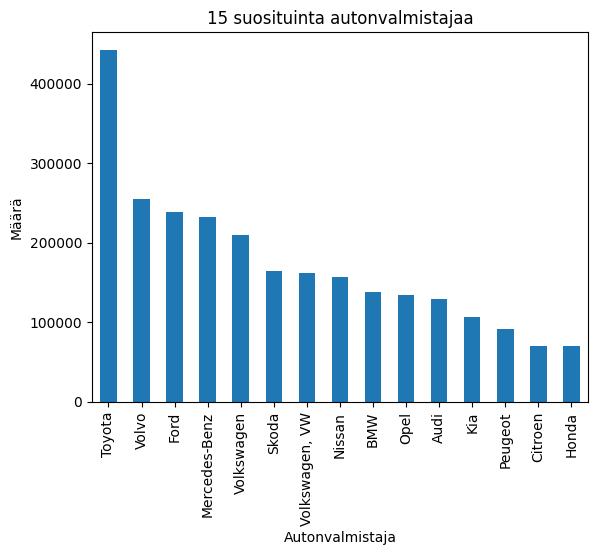

In [262]:
valmistaja = df['Valmistaja'].value_counts().head(15).plot(kind='bar', title='15 suosituinta autonvalmistajaa')
valmistaja.set_xlabel('Autonvalmistaja')
valmistaja.set_ylabel('Määrä')
plt.show()

Toyota on huomattavasti suosituin autonvalmistaja Suomessa.

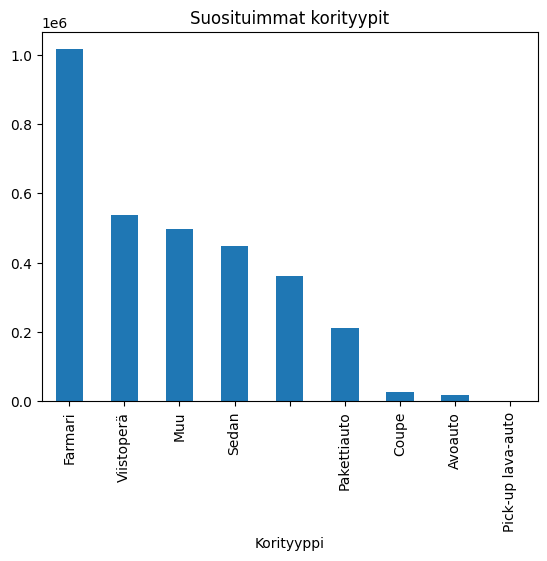

In [263]:
korityyppi = df['Korityyppi'].value_counts().plot(kind='bar', title='Suosituimmat korityypit')
valmistaja.set_xlabel('Korityyppi')
valmistaja.set_ylabel('Määrä')
plt.show()

Suosituin korityyppi on farmari

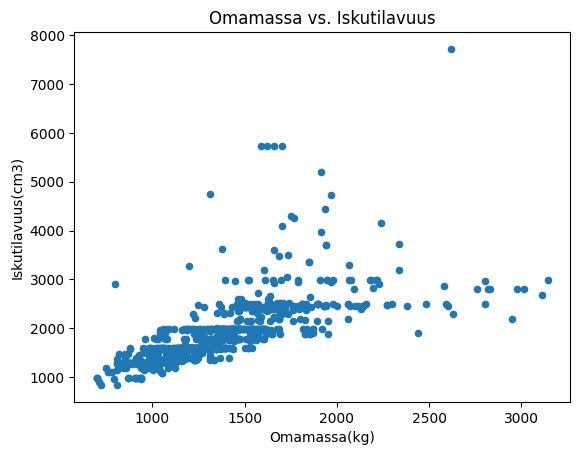

In [264]:
df.head(1000).plot(kind='scatter', x='Omamassa(kg)', y='Iskutilavuus(cm3)', title='Omamassa vs. Iskutilavuus')
plt.show()

Suurin osa ajoneuvoista on alle 2000kg omamassaltaan ja iskutilavuus on 2000cm3 tai pienempiä.

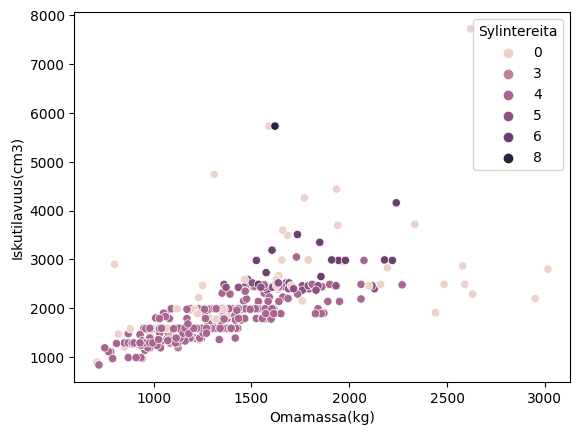

In [265]:
sns.scatterplot(x='Omamassa(kg)', y='Iskutilavuus(cm3)', hue='Sylintereita', data=df.head(500))
plt.show()

Suurin osa ajoneuvoista on alle 2000kg omamassaltaan ja iskutilavuus on 2000cm3 tai pienempiä. Lisäksi suosituimmat sylintereiden lukumäärä ajoneuvoissa on vähemmän kuin viisi.

In [266]:
df

,Ajoneuvoluokka,Kayttoonottovuosi,Korityyppi,Istumapaikkoja,Omamassa(kg),Pituus(mm),Leveys(mm),Korkeus(mm),Kayttovoima,Iskutilavuus(cm3),Sylintereita,Ahdin,Valmistaja,Malli,Paastot (NEDC_Co2),Mittarilukema
2,Henkilöauto,1984,,5,780,0,1590,0,Bensiini,1110,4,,Ford,FIESTA,,0
5,Henkilöauto,1990,,5,1060,4270,1680,0,Bensiini,1900,4,,Citroen,BX,,0
6,Henkilöauto,2003,Viistoperä,5,955,3770,1640,1420,Bensiini,1140,4,,Renault,CLIO,143.0,159443
7,Henkilöauto,2003,Sedan,5,1462,4670,1760,1450,Bensiini,1990,4,,Honda,ACCORD,190.0,279326
8,Henkilöauto,2006,Farmari,5,1270,4410,1710,1500,Bensiini,1590,4,,Toyota,COROLLA,172.0,151108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360963,Henkilöauto,2022,Farmari,5,1975,4545,1805,1680,Bensiini,2360,4,False,Mitsubishi,Mitsubishi Eclipse Cross,,24945
5360966,Henkilöauto,2020,Sedan,5,1684,4694,1850,1443,Sähkö,0,0,False,Tesla,Model 3,,64205
5360970,Henkilöauto,1930,Sedan,5,1300,4300,1700,0,Bensiini,3205,6,False,Chrysler,Six,,83327
5360976,Henkilöauto,2022,Viistoperä,5,2040,4729,1890,1571,Bensiini,1991,4,True,Mercedes-Benz,GLC 300 e 4MATIC,,36474


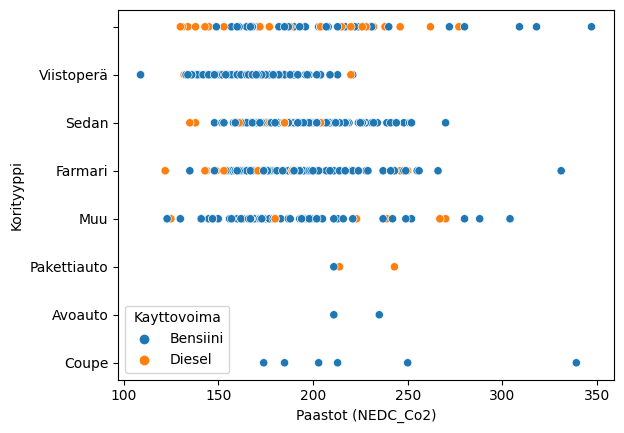

In [269]:
df['Paastot (NEDC_Co2)'] = pd.to_numeric(df['Paastot (NEDC_Co2)'], errors='coerce')
sns.scatterplot(x='Paastot (NEDC_Co2)', y='Korityyppi', hue='Kayttovoima', data=df.head(1000))
plt.show()

Viistoperien päästöt ovat tyypillisesti pienempiä ja bensiinikäyttöisiä.

In [271]:
df.dtypes

Ajoneuvoluokka         object
Kayttoonottovuosi      object
Korityyppi             object
Istumapaikkoja          int64
Omamassa(kg)            int64
Pituus(mm)              int64
Leveys(mm)              int64
Korkeus(mm)             int64
Kayttovoima            object
Iskutilavuus(cm3)       int64
Sylintereita            int64
Ahdin                  object
Valmistaja             object
Malli                  object
Paastot (NEDC_Co2)    float64
Mittarilukema           int64
dtype: object

In [279]:
df_korrelaatio = df[['Istumapaikkoja','Omamassa(kg)','Pituus(mm)','Leveys(mm)','Korkeus(mm)','Iskutilavuus(cm3)','Sylintereita','Paastot (NEDC_Co2)','Mittarilukema']].dropna().corr().round(3)

<Axes: >

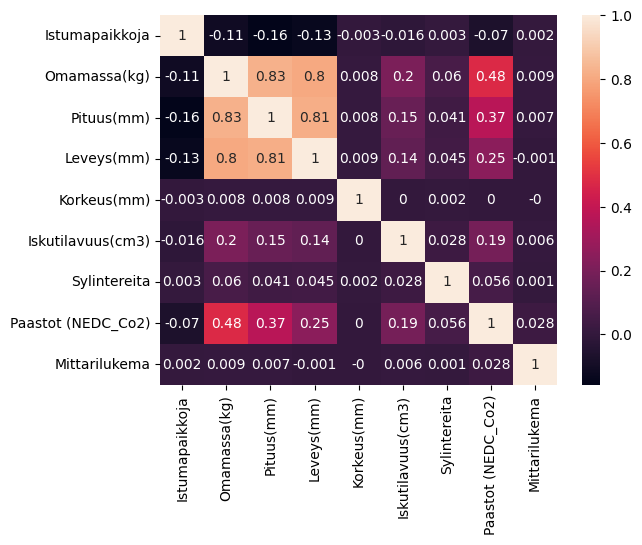

In [280]:
sns.heatmap(df_korrelaatio, annot=True)

Tieedostosta ei löydy merkittäviä korrelaatioita. Pituuden ja leveyden korrelaatio on itsestäänselvää. Päästöt/omamassan korrelaatio on yllättävän matala ja osittain itsestäänselvää.